In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import jpholiday
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_excel('/Users/hiraokatatsuru/Library/CloudStorage/OneDrive-個人用/ドキュメント/物数データ.xlsx')
df.set_index('date', inplace=True)

In [4]:
df

,通常物数
date,
2021-10-01,63000
2021-10-02,0
2021-10-03,0
2021-10-04,102000
2021-10-05,45000
...,...
2025-05-27,29000
2025-05-28,32000
2025-05-29,36000


/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hirao

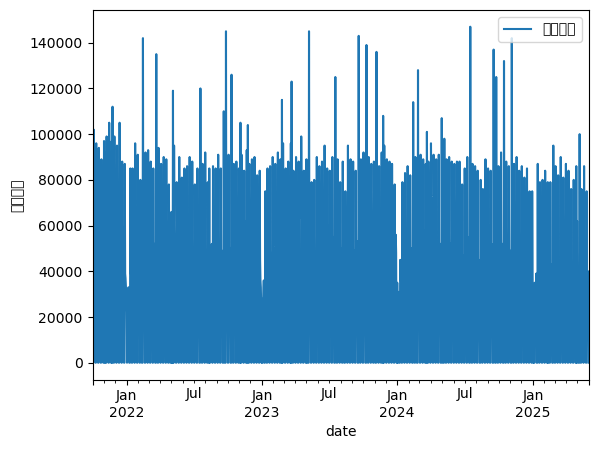

In [5]:
df.plot()
plt.ylabel('通常物数')
plt.xlabel('date')
plt.show()

In [15]:
import matplotlib.dates as mdates

AttributeError: XTick.set() got an unexpected keyword argument 'rotation'

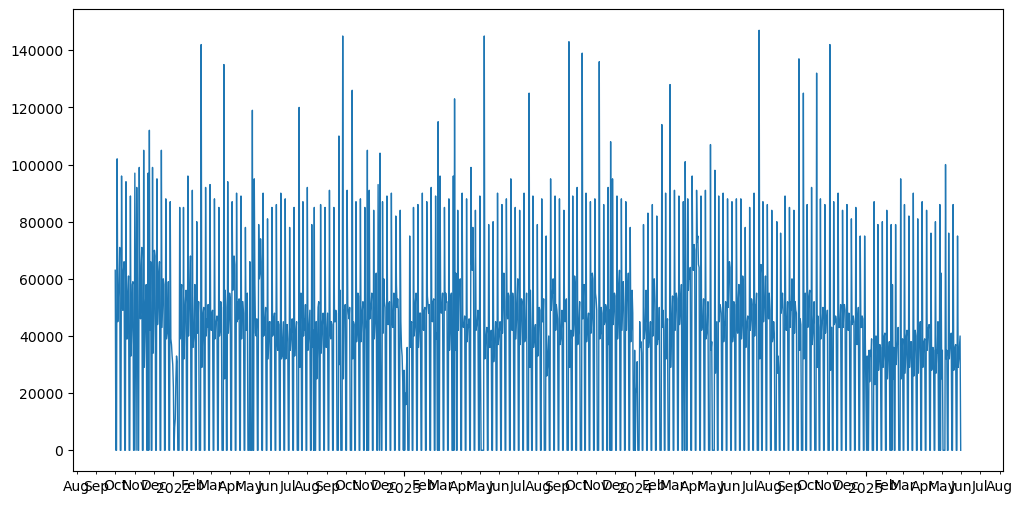

In [16]:
# ④ 図を作成（縦長にすると日付ラベルが潰れにくい）
fig, ax = plt.subplots(figsize=(12, 6))

# ⑤ 折れ線をプロット（x=df.index, y=df["value"]）
ax.plot(df.index, df["通常物数"], color="tab:blue", linewidth=1)

# ⑥ 横軸（日付）のフォーマット設定
#    - 年単位のメジャータック（MajorLocator）
#    - 月単位のマイナータック（MinorLocator）
ax.xaxis.set_major_locator(mdates.YearLocator())       # 毎年の 1/1 に大きく目盛
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  # "2021", "2022", ... を表示
ax.xaxis.set_minor_locator(mdates.MonthLocator())      # 各月の開始日に小さく目盛
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))  # "Jan", "Feb", ... を表示

# ⑦ 目盛ラベルを見やすく回転
plt.setp(ax.xaxis.get_major_ticks(), rotation=0, ha="center")   # 年ラベルは横向き
plt.setp(ax.xaxis.get_minor_ticks(), rotation=90, ha="center", fontsize=6)  # 月ラベルは縦向き・小さめ

# ⑧ グリッドを表示して背景を見やすく
ax.grid(which="major", linestyle="--", linewidth=0.5, alpha=0.7)
ax.grid(which="minor", linestyle=":", linewidth=0.3, alpha=0.5)

# ⑨ ラベル・タイトルを追加
ax.set_title("2021–2024 年の日次時系列データ")
ax.set_ylabel("値")
ax.set_xlabel("日付")

plt.tight_layout()

/var/folders/t3/j19g2ldj2ks74jzlzsqq83640000gn/T/ipykernel_60144/2470952355.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()  # インデックスは Month End


AttributeError: XTick.set() got an unexpected keyword argument 'rotation'

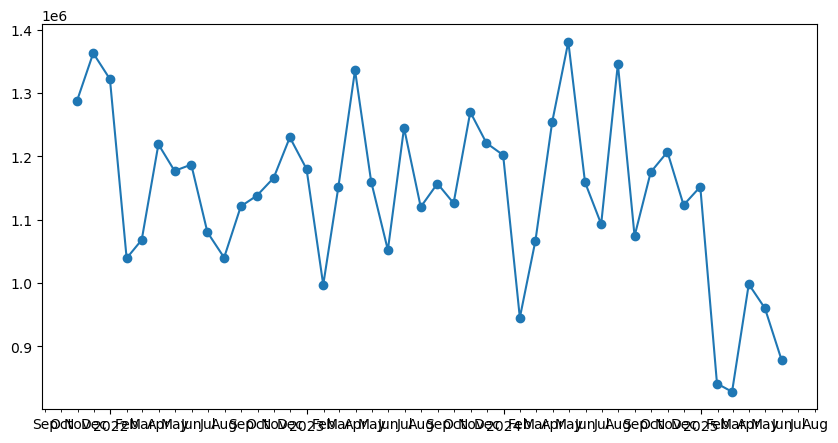

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ① 月次合計を取得
df_monthly = df.resample('M').sum()  # インデックスは Month End

# ② プロット領域を作成
fig, ax = plt.subplots(figsize=(10, 5))

# ③ 折れ線グラフを描画
ax.plot(
    df_monthly.index,     # 月末の日付インデックス（DatetimeIndex）
    df_monthly['通常物数'],  # 月ごとの合計値
    marker='o',
    linestyle='-',
    color='tab:blue',
    label='月次合計'
)

# ④ 横軸のフォーマットを調整（年＋月を見せる）
ax.xaxis.set_major_locator(mdates.YearLocator())           # 毎年のタック
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))   # 年だけ表示
ax.xaxis.set_minor_locator(mdates.MonthLocator())          # 月ごとに小タック
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))   # 月名（例: Jan, Feb）

plt.setp(ax.xaxis.get_major_ticks(), rotation=0, ha='center')
plt.setp(ax.xaxis.get_minor_ticks(), rotation=90, fontsize=6)

# ⑤ グリッド・タイトル・ラベル
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

ax.set_title("2021–2024 年の月次合計時系列")
ax.set_xlabel("年月")
ax.set_ylabel("合計値")
ax.legend()

plt.tight_layout()
plt.show()


/var/folders/t3/j19g2ldj2ks74jzlzsqq83640000gn/T/ipykernel_60144/1731734106.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').sum()


AttributeError: XTick.set() got an unexpected keyword argument 'rotation'

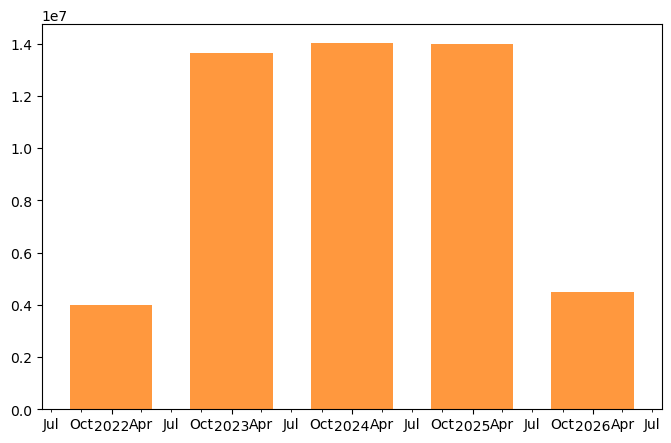

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 年次合計を先に取得しておく ---
df_yearly = df.resample('Y').sum()

# --- 図を生成 ---
fig, ax = plt.subplots(figsize=(8, 5))

# --- 棒グラフのプロット（x=年末日、y=合計値） ---
# バー幅（width）は日付型インデックスなので "365" 日程度を指定
ax.bar(
    df_yearly.index,       # 年末の日付インデックス (Timestamp)
    df_yearly['通常物数'],    # 年ごとの合計値
    width=250,             # 幅: 250日分 (1年=約365日なので少し狭め)
    align='center',
    color='tab:orange',
    alpha=0.8,
    label='年次合計'
)

# --- x軸（年）のフォーマット調整 ---
# 1) メジャー目盛を 年初 (Jan 1) に揃えたいなら YearLocator(YYYY) を使う
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# 2) マイナー目盛を四半期単位や半年単位で入れる場合 (必要に応じて)
#    ここでは四半期ごとを例示
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))  
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%b"))

# 目盛ラベルの回転・フォントサイズ
plt.setp(ax.xaxis.get_major_ticks(), rotation=0, ha='center')
plt.setp(ax.xaxis.get_minor_ticks(), rotation=90, fontsize=8)

# --- 装飾・ラベル ---
ax.set_title("2021–2024 年の年次合計（棒グラフ）")
ax.set_xlabel("年度")
ax.set_ylabel("合計値")
ax.legend()
ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


AttributeError: XTick.set() got an unexpected keyword argument 'rotation'

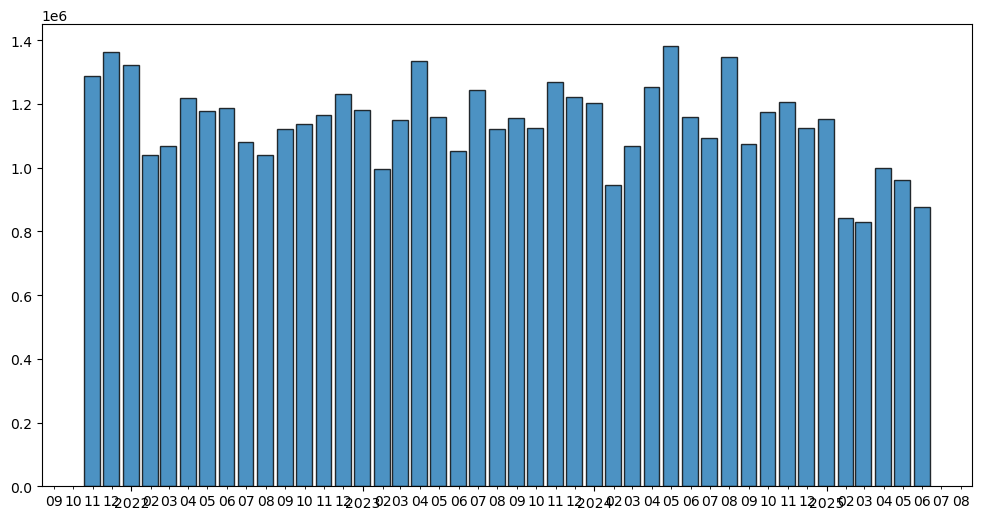

In [20]:
# ─── 図のサイズを指定 ───
fig, ax = plt.subplots(figsize=(12, 6))

# ─── 棒グラフをプロット ───
# x 軸を df_monthly.index（各月の「月末日」）、y 軸を df_monthly["value"]（その月の合計値）とする。
# width は「1か月分の日数」に近い値（例：25〜28）を指定して、隣り合うバーをくっつけすぎないようにする。
ax.bar(
    df_monthly.index,
    df_monthly["通常物数"],
    width=25,              # 25 日分の幅を指定すると、隣の月と多少スペースができる
    align="center",
    edgecolor="black",
    alpha=0.8,
    label="月次合計"
)

# ─── x 軸（日付）のフォーマット調整 ───
# メジャー目盛: 年単位（各年の 1/1）、ラベルは西暦だけ表示
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# マイナー目盛: 各月の月初（1日）
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m"))  # 月を 01, 02, ... で表示

# メジャー目盛ラベル（年）の回転・位置
plt.setp(ax.xaxis.get_major_ticks(), rotation=0, ha="center")
# マイナー目盛ラベル（月）の回転・フォントサイズ
plt.setp(ax.xaxis.get_minor_ticks(), rotation=90, fontsize=8)

# ─── グリッド・タイトル・ラベル ───
ax.grid(which="major", axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_title("2021–2024 年の日次データを月次合計にして棒グラフ化")
ax.set_xlabel("年月")
ax.set_ylabel("合計値")
ax.legend()

plt.tight_layout()
plt.show()


/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/Users/hiraokatatsuru/miniconda3/envs/shift_builder/lib/python3.12/site-packages/IPython/cor

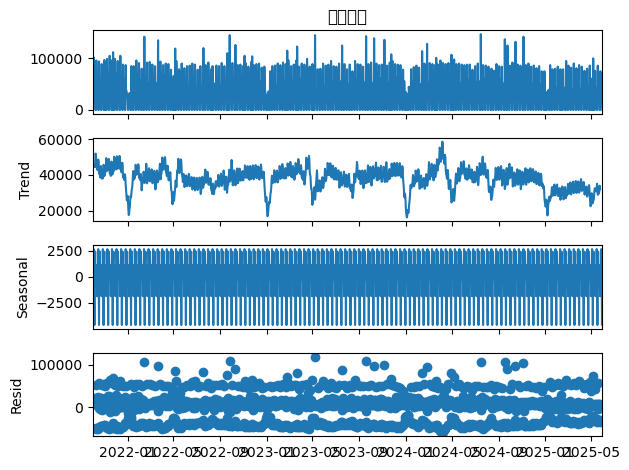

In [22]:
import statsmodels.api as sm

# 例として加法モデルで成分分解（freq=12 は月次データであることを指定）
decomposition = sm.tsa.seasonal_decompose(df["通常物数"], model="additive", period=12)

# 各成分を取り出す
trend_sm     = decomposition.trend
seasonal_sm  = decomposition.seasonal
residual_sm  = decomposition.resid

# プロット
decomposition.plot()
plt.tight_layout()
plt.show()


In [24]:
df = df.asfreq("M")

# 乗法モデルで成分分解（period=12: 月次データの周期は12か月）
decomp_mul = sm.tsa.seasonal_decompose(df["通常物数"], model="multiplicative", period=12)

# 戻り値の各成分を取得
trend_sm_mul    = decomp_mul.trend       # トレンド
seasonal_sm_mul = decomp_mul.seasonal    # 季節性（乗法）
resid_sm_mul    = decomp_mul.resid       # 残差

# 分解結果をまとめて表示（Statsmodels 自動プロット）
fig = decomp_mul.plot()
fig.set_size_inches(12, 9)
plt.suptitle("乗法モデルによる成分分解 (Statsmodels)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/t3/j19g2ldj2ks74jzlzsqq83640000gn/T/ipykernel_60144/3673988663.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.asfreq("M")


ValueError: Multiplicative seasonality is not appropriate for zero and negative values